## Tubes ML - Agglomerative Clustering

### Konsep :

Agglomerative Clustering merupakan tipe algoritma clustering hierarkis yang menggunakan approach bottom-up; dengan kata lain, algoritma ini membangun hierarki cluster dari mulai kondisi satu data memiliki clusternya sendiri hingga tercapai kondisi semua data ada pada satu cluster. Konsep agglomerative clustering sendiri merupakan ide yang sangat umum, sehingga memiliki berbagai variasi dalam acuan clusteringnya, antara lain : 

- Fungsi metrik yang menyatakan 'jarak' antar data, seperti jarak Euklidean, Manhattan, Mahalanobis dsb. yang penggunaannya tergantung pada konteks data numerik. 

- Fungsi linkage yang menyatakan acuan jarak yang dipergunakan antar cluster, misalnya fungsi complete-linkage, single-linkage, average-linkage, dan average-group-linkage.

Dalam tugas ini diterapkan keempat fungsi linkage yang disebutkan diatas dengan fungsi metrik Euklidean

### Pseudocode : 

##### Fungsi secara general

 ```
 AgglomerativeCluster(data, n_cluster, linkage) {
     distanceMatrix = initDistanceMatrix(data)
     labels = initLabels(length(data))
     clusters = initClusters(data)
     while (length(clusters) > n_cluster) {
         newCluster = mergeMinDist(clusters)
         ...(renew berdasarkan linkage)
     return labels
 ```

###### Fungsi linkage single

```
        if (linkage == "single") {
             for each cluster c in clusters
                 minDist = None
                 for each data i in newCluster
                     for each data j in c
                         minDist = min(minDist, distance(i, j)
                 distanceMatrix[i,j] = minDist
```

###### Fungsi linkage complete

```
        else if (linkage == "complete") {
             for each cluster c in clusters
                 maxDist = None
                 for each data i in newCluster
                     for each data j in c
                         maxDist = max(maxDist, distance(i, j)
                 distanceMatrix[i,j] = maxDist
```

###### Fungsi linkage average-group

```
        else if (linkage == "average-group") {
             c = meanCentroid(newCluster)
             for each cluster c in clusters
                 c1 = meanCentroid(c)
                 distanceMatrix[i,j] = distance(c, c1)
```

###### Fungsi linkage average-group

```
        else if (linkage == "average") {
             for each cluster c in clusters
                 sum = 0
                 for each data i in newCluster
                     for each data j in c
                         sum += distance(i, j)
                 distanceMatrix[i,j] = sum / length(newCluster)*length(c)
```

### Hasil Pemrograman dan Clustering

Source code class dibuat berikut penjelasannya dalam bentuk komentar pada file `myAgglo.py` yang kemudian dapat di-import dan digunakan seperti berikut: 

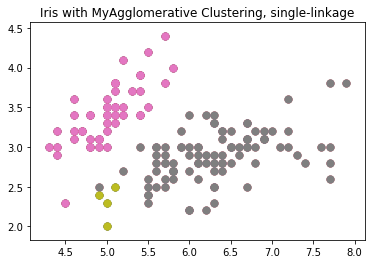

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       0.48      0.92      0.63        50
          2       0.00      0.00      0.00        50

avg / total       0.49      0.64      0.54       150

('accuracy = ', 0.64000000000000001)


In [31]:
import numpy as np
import matplotlib.pyplot as plt

from myAgglo import MyAgglomerativeClustering
from sklearn import datasets
from sklearn.metrics import classification_report, accuracy_score

iris = datasets.load_iris()
clustering = MyAgglomerativeClustering(linkage="single")
prediction = clustering.fit_predict(iris.data)

plt.scatter(iris.data[prediction == 0, 0], iris.data[prediction == 0, 1], s=50)
plt.scatter(iris.data[prediction == 1, 0], iris.data[prediction == 1, 1], s=50)
plt.scatter(iris.data[prediction == 2, 0], iris.data[prediction == 2, 1], s=50)

plt.title('Iris with MyAgglomerative Clustering, single-linkage')
plt.show()

print(classification_report(iris.target, prediction))
print('accuracy = ', accuracy_score(iris.target, prediction, normalize=True))

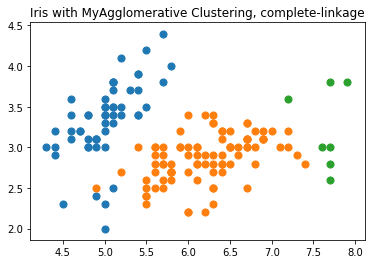

             precision    recall  f1-score   support

          0       0.93      1.00      0.96        50
          1       0.52      0.92      0.66        50
          2       1.00      0.14      0.25        50

avg / total       0.81      0.69      0.62       150

('accuracy = ', 0.68666666666666665)


In [32]:
clustering = MyAgglomerativeClustering(linkage="complete")
prediction = clustering.fit_predict(iris.data)

plt.scatter(iris.data[prediction == 0, 0], iris.data[prediction == 0, 1], s=50)
plt.scatter(iris.data[prediction == 1, 0], iris.data[prediction == 1, 1], s=50)
plt.scatter(iris.data[prediction == 2, 0], iris.data[prediction == 2, 1], s=50)

plt.title('Iris with MyAgglomerative Clustering, complete-linkage')
plt.show()

print(classification_report(iris.target, prediction))
print('accuracy = ', accuracy_score(iris.target, prediction, normalize=True))

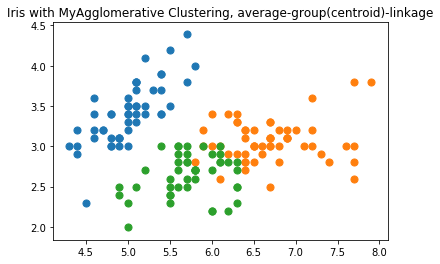

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       0.27      0.30      0.29        50
          2       0.22      0.20      0.21        50

avg / total       0.50      0.50      0.50       150

('accuracy = ', 0.5)


In [33]:
clustering = MyAgglomerativeClustering(linkage="average-group")
prediction = clustering.fit_predict(iris.data)

plt.scatter(iris.data[prediction == 0, 0], iris.data[prediction == 0, 1], s=50)
plt.scatter(iris.data[prediction == 1, 0], iris.data[prediction == 1, 1], s=50)
plt.scatter(iris.data[prediction == 2, 0], iris.data[prediction == 2, 1], s=50)

plt.title('Iris with MyAgglomerative Clustering, average-group(centroid)-linkage')
plt.show()

print(classification_report(iris.target, prediction))
print('accuracy = ', accuracy_score(iris.target, prediction, normalize=True))

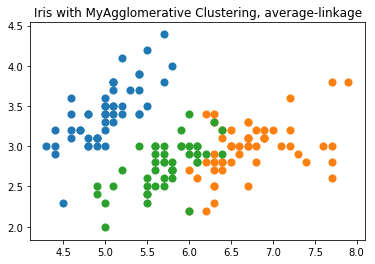

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        50
          1       0.24      0.26      0.25        50
          2       0.20      0.18      0.19        50

avg / total       0.48      0.48      0.48       150

('accuracy = ', 0.47999999999999998)


In [34]:
clustering = MyAgglomerativeClustering(linkage="average")
prediction = clustering.fit_predict(iris.data)

plt.scatter(iris.data[prediction == 0, 0], iris.data[prediction == 0, 1], s=50)
plt.scatter(iris.data[prediction == 1, 0], iris.data[prediction == 1, 1], s=50)
plt.scatter(iris.data[prediction == 2, 0], iris.data[prediction == 2, 1], s=50)

plt.title('Iris with MyAgglomerative Clustering, average-linkage')
plt.show()

print(classification_report(iris.target, prediction))
print('accuracy = ', accuracy_score(iris.target, prediction, normalize=True))

Dapat dilihat pada keempat data diatas bahwa linkage function dapat mempengaruhi hasil clustering secara signifikan, dan perlu dicocokkan kembali dengan konteks data yang digunakan. Salah satu parameter lain yang belum dicobakan adalah penggunaan metrik jarak yang lain, namun belum diimplementasikan pada tugas ini.